# Notebook para el Asistente Virtual

### Elaborado por Alvaro Zambrana Sejas
### Universidad Mayor de San Simón
### 2024

Entrenamiento local con YOLO utilizando un dataset personalizado.

Requirements:
- Anaconda
- Python 3.10 

Configurar:
```
conda create -n copiloto-virtual python=3.10
conda activate copiloto-virtual
``` 

In [1]:
!python --version

Python 3.10.15


In [2]:
!nvidia-smi

Tue Nov 26 07:31:56 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.03                 Driver Version: 566.03         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3090      WDDM  |   00000000:01:00.0  On |                  N/A |
| 36%   37C    P8             29W /  350W |    2310MiB /  24576MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Download repo and installing required packages

In [3]:
import os
%cd ..

HOME = os.getcwd()
parent_dir = os.path.dirname(HOME)
print(f'HOME: {HOME}')

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

C:\Users\Alvaro\PycharmProjects\copilotoVirtual
HOME: C:\Users\Alvaro\PycharmProjects\copilotoVirtual


C:\apps\anaconda3\envs\copiloto-virtual\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# !git clone https://github.com/THU-MIG/yolov10.git
# %cd yolov10
# !pip install .
# %cd ..

In [6]:
!pip install huggingface_hub


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!yolo -version

8.1.34


### Downloading pretrained weights

In [7]:
import os
import urllib.request

# Create a directory for the weights in the current working directory
weights_dir = os.path.join(os.getcwd(), "weights")
os.makedirs(weights_dir, exist_ok=True)

# URLs of the weight files
urls = [
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10s.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10m.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10b.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10x.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10l.pt"
]

# Download each file
for url in urls:
    file_name = os.path.join(weights_dir, os.path.basename(url))
    urllib.request.urlretrieve(url, file_name)
    print(f"{file_name} downloaded")

C:\Users\Alvaro\PycharmProjects\copilotoVirtual\weights\yolov10n.pt downloaded
C:\Users\Alvaro\PycharmProjects\copilotoVirtual\weights\yolov10s.pt downloaded
C:\Users\Alvaro\PycharmProjects\copilotoVirtual\weights\yolov10m.pt downloaded
C:\Users\Alvaro\PycharmProjects\copilotoVirtual\weights\yolov10b.pt downloaded
C:\Users\Alvaro\PycharmProjects\copilotoVirtual\weights\yolov10x.pt downloaded
C:\Users\Alvaro\PycharmProjects\copilotoVirtual\weights\yolov10l.pt downloaded


# Inferencia utilizando el model de YOLO pre-entrenado

In [8]:
!cd {HOME}
!yolo task=detect mode=predict conf=0.25 save=True model={HOME}/weights/yolov10n.pt source=".\\dataset\\yolo_signals_cbba_with_augmented_data\\test\\images\\2024_09_08_17_28_09_150_-0400_1280x1280.right-region.jpg"

Ultralytics YOLOv8.1.34 ðŸš€ Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24575MiB)
YOLOv10n summary (fused): 285 layers, 2762608 parameters, 63840 gradients, 8.6 GFLOPs

image 1/1 C:\Users\Alvaro\PycharmProjects\copilotoVirtual\dataset\yolo_signals_cbba_with_augmented_data\test\images\2024_09_08_17_28_09_150_-0400_1280x1280.right-region.jpg: 640x640 1 0, 2 2s, 1 5, 23.5ms
Speed: 4.0ms preprocess, 23.5ms inference, 98.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict15
ðŸ’¡ Learn more at https://docs.ultralytics.com/modes/predict


C:\apps\anaconda3\envs\copiloto-virtual\lib\site-packages\ultralytics\nn\tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cp

In [9]:
from IPython.display import Image

Image(filename=f".\\dataset\\yolo_signals_cbba_with_augmented_data\\test\\images\\2024_09_08_17_28_09_150_-0400_1280x1280.right-region.jpg", height=640)

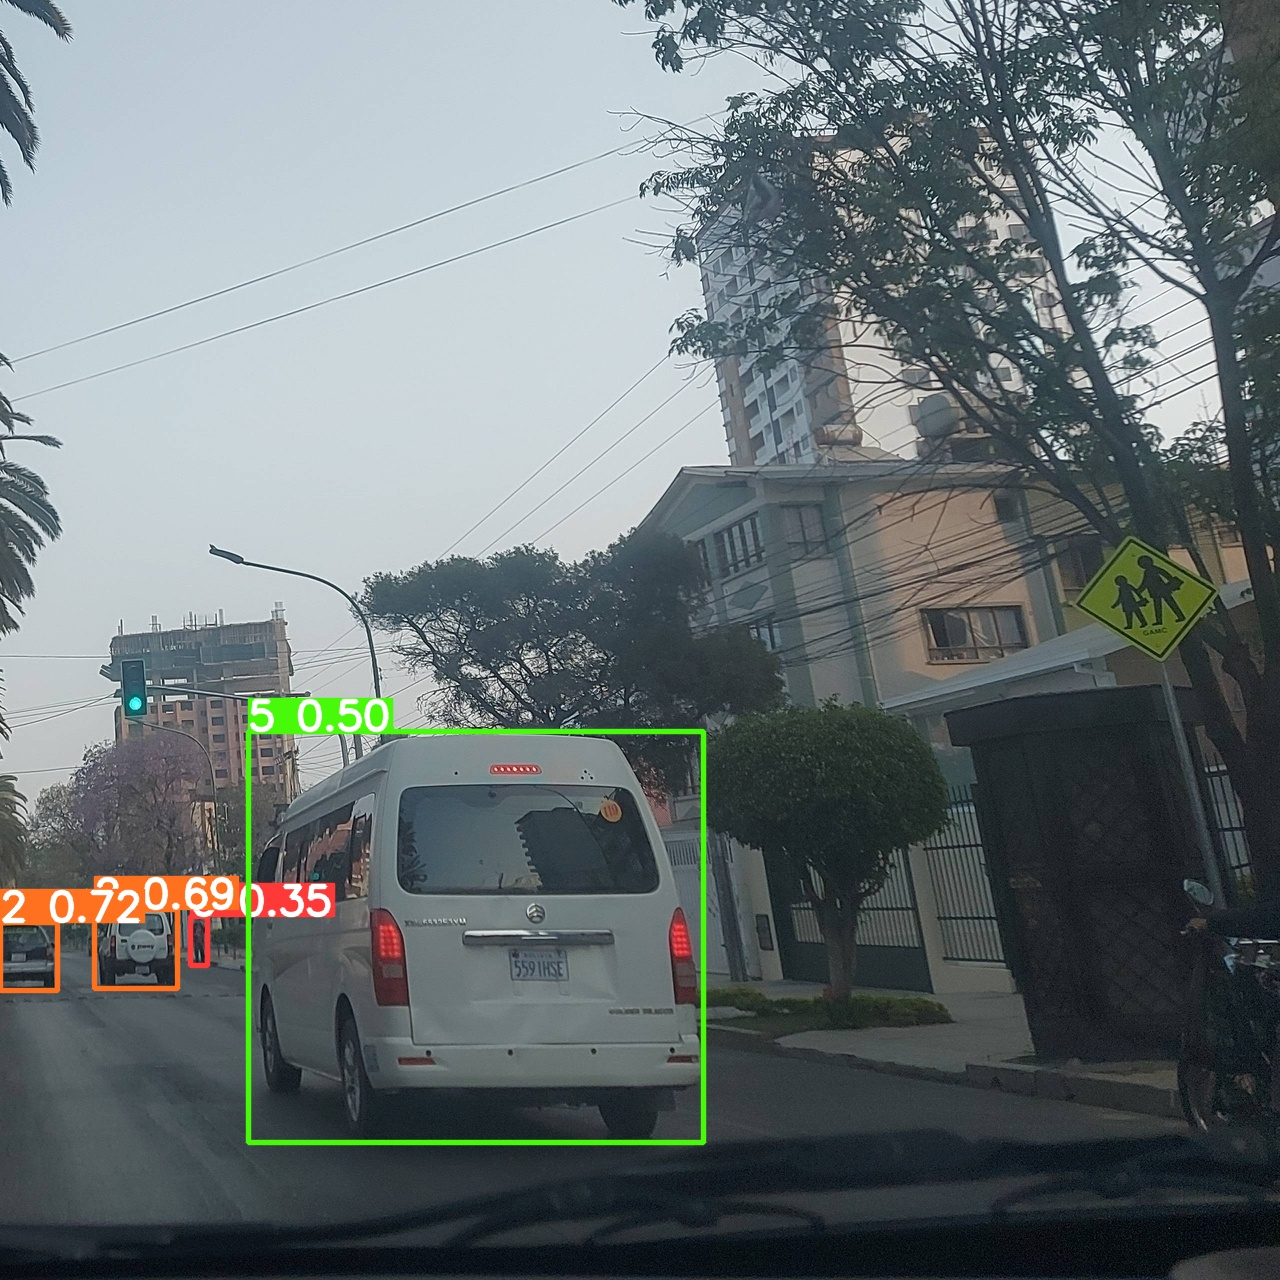

In [10]:
from IPython.display import Image

# Display the detected image
Image(filename=f".\\runs\\detect\\predict15\\2024_09_08_17_28_09_150_-0400_1280x1280.right-region.jpg", height=640)

# Train Custom Model

In [11]:
import torch
print(torch.cuda.is_available())

True


In [12]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Wed_Aug_14_10:26:51_Pacific_Daylight_Time_2024
Cuda compilation tools, release 12.6, V12.6.68
Build cuda_12.6.r12.6/compiler.34714021_0


In [13]:
torch.version.cuda

'12.4'

In [14]:
import ultralytics

ultralytics.checks()

Ultralytics YOLOv8.1.34 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24575MiB)
Setup complete ✅ (12 CPUs, 31.9 GB RAM, 771.1/953.0 GB disk)


In [15]:
!pip install albumentations==1.4

  Using cached albumentations-1.4.0-py3-none-any.whl.metadata (35 kB)
  Using cached qudida-0.0.4-py3-none-any.whl.metadata (1.5 kB)
Using cached albumentations-1.4.0-py3-none-any.whl (123 kB)
Using cached qudida-0.0.4-py3-none-any.whl (3.5 kB)
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.21
    Uninstalling albumentations-1.4.21:
      Successfully uninstalled albumentations-1.4.21



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from ultralytics import YOLOv10
model = YOLOv10(f'{HOME}\\weights\\yolov10n.pt')

# Train the model
model.train(    
    data=f'.\\dataset\\yolo_signals_cbba_with_augmented_data\\data.yaml',
    epochs=10,
    batch=32,
    device=0
)
# model = YOLOv10(f'{HOME}/yolov10/weights/yolov10n.pt')

c:\apps\anaconda3\envs\copiloto-virtual\lib\site-packages\ultralytics\nn\tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cp

New https://pypi.org/project/ultralytics/8.3.4 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.9.19 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24575MiB)
engine\trainer: task=detect, mode=train, model=C:\Users\Alvaro\PycharmProjects\copilotoVirtual\weights\yolov10n.pt, data=.\dataset\yolo_signals_cbba_with_augmented_data\data.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=0, workers=8, project=None, name=train18, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, vis

c:\apps\anaconda3\envs\copiloto-virtual\lib\site-packages\ultralytics\nn\tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cp

AMP: checks passed ✅


c:\apps\anaconda3\envs\copiloto-virtual\lib\site-packages\ultralytics\engine\trainer.py:276: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)
train: Scanning C:\Users\Alvaro\PycharmProjects\copilotoVirtual\dataset\yolo_signals_cbba\train\labels.cache... 816 images, 0 backgrounds, 0 corrupt: 100%|██████████| 816/816 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\Alvaro\PycharmProjects\copilotoVirtual\dataset\yolo_signals_cbba\val\labels.cache... 235 images, 0 backgrounds, 0 corrupt: 100%|██████████| 235/235 [00:00<?, ?it/s]


Plotting labels to runs\detect\train18\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train18
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       1/10      5.93G       1.17      5.859      1.007      1.321      13.68     0.9592         17        640: 100%|██████████| 26/26 [00:10<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all        235        259    0.00373      0.155    0.00446    0.00368



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       2/10      5.98G      1.162      4.284      0.977      1.268       11.8     0.9023         15        640: 100%|██████████| 26/26 [00:07<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all        235        259    0.00356      0.251     0.0256     0.0188



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       3/10      5.98G      1.109      3.428     0.9835      1.273      10.65      0.926         16        640: 100%|██████████| 26/26 [00:07<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]

                   all        235        259    0.00534        0.3     0.0899     0.0614



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       4/10      5.97G      1.058      3.039     0.9636      1.225       9.98     0.9112         18        640: 100%|██████████| 26/26 [00:06<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all        235        259      0.976     0.0362      0.131     0.0917



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       5/10      5.97G      1.056      2.744     0.9743      1.239      9.126     0.9327         17        640: 100%|██████████| 26/26 [00:07<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all        235        259      0.863      0.075      0.238      0.168



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       6/10      5.97G     0.9962      2.537     0.9515       1.24       8.56     0.9274         15        640: 100%|██████████| 26/26 [00:07<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]

                   all        235        259      0.832      0.165      0.276      0.194



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       7/10      5.98G     0.9867      2.304     0.9635      1.171      7.812     0.9239         15        640: 100%|██████████| 26/26 [00:07<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]

                   all        235        259      0.782      0.242      0.349      0.239



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       8/10      5.97G     0.9318      2.126     0.9359      1.157      7.436     0.9121         16        640: 100%|██████████| 26/26 [00:06<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all        235        259      0.819      0.264      0.434      0.323



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       9/10      5.97G      0.916      2.006     0.9235      1.126      6.973     0.9094         14        640: 100%|██████████| 26/26 [00:07<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]

                   all        235        259      0.797      0.262      0.387      0.274



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      10/10      5.97G     0.8911      1.875     0.9068      1.081       6.73     0.8969         16        640: 100%|██████████| 26/26 [00:07<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.93it/s]

                   all        235        259       0.68      0.329      0.429      0.305



10 epochs completed in 0.044 hours.
Optimizer stripped from runs\detect\train18\weights\last.pt, 5.8MB
Optimizer stripped from runs\detect\train18\weights\best.pt, 5.8MB

Validating runs\detect\train18\weights\best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.9.19 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24575MiB)
YOLOv10n summary (fused): 285 layers, 2700266 parameters, 0 gradients, 8.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]


                   all        235        259       0.82      0.264      0.434      0.319
          zona-escolar        235        104      0.694      0.875      0.874       0.63
                  pare        235         46      0.531      0.717      0.712      0.519
         paso-peatonal        235          6          1          0      0.022     0.0119
          ceda-el-paso        235         14      0.704      0.429      0.684       0.44
   limite-velocidad-10        235          2          1          0      0.495      0.446
   limite-velocidad-20        235          3          1          0     0.0422      0.038
   limite-velocidad-30        235         12      0.756      0.167      0.519      0.383
   limite-velocidad-40        235          4          1          0      0.223      0.163
   limite-velocidad-35        235          7          1      0.275      0.634      0.475
prohibido-girar-izquierda        235         43      0.729      0.791      0.813      0.639
     prohibido-gir

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001AFB6BB7280>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.0

In [16]:
# Set YOLO to quiet mode
os.environ['YOLO_VERBOSE'] = 'True'
os.environ['NO_ALBUMENTATIONS_UPDATE'] = '1'

%cd {HOME}

!yolo task=detect mode=train epochs=300 batch=32 plots=True model='./weights/yolov10n.pt' data="./dataset/yolo_signals_cbba_with_augmented_data/data.yaml" device=0

C:\Users\Alvaro\PycharmProjects\copilotoVirtual


C:\apps\anaconda3\envs\copiloto-virtual\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


New https://pypi.org/project/ultralytics/8.3.37 available ðŸ˜ƒ Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 ðŸš€ Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24575MiB)
engine\trainer: task=detect, mode=train, model=./weights/yolov10n.pt, data=./dataset/yolo_signals_cbba_with_augmented_data/data.yaml, epochs=300, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=0, workers=8, project=None, name=train25, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic

C:\apps\anaconda3\envs\copiloto-virtual\lib\site-packages\ultralytics\nn\tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cp

# Inference

In [17]:
!yolo task=detect mode=predict conf=0.25 save=True model=./runs/detect/train25/weights/best.pt source=C:\Users\Alvaro\PycharmProjects\copilotoVirtual\dataset\yolo_signals_cbba_with_augmented_data\test\images\2024_10_01_12_40_45_425_-0400_1280x1280.right-region.jpg

Ultralytics YOLOv8.1.34 ðŸš€ Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24575MiB)
YOLOv10n summary (fused): 285 layers, 2700266 parameters, 0 gradients, 8.3 GFLOPs

image 1/1 C:\Users\Alvaro\PycharmProjects\copilotoVirtual\dataset\yolo_signals_cbba_with_augmented_data\test\images\2024_10_01_12_40_45_425_-0400_1280x1280.right-region.jpg: 640x640 1 ceda-el-paso, 14.0ms
Speed: 4.0ms preprocess, 14.0ms inference, 118.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict16
ðŸ’¡ Learn more at https://docs.ultralytics.com/modes/predict


C:\apps\anaconda3\envs\copiloto-virtual\lib\site-packages\ultralytics\nn\tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cp

In [18]:
!yolo task=detect mode=predict conf=0.25 save=True model=./runs/detect/train25/weights/best.pt source=C:\Users\Alvaro\PycharmProjects\copilotoVirtual\dataset\external\Screenshot_2024-10-04_001459.png

Ultralytics YOLOv8.1.34 ðŸš€ Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24575MiB)
YOLOv10n summary (fused): 285 layers, 2700266 parameters, 0 gradients, 8.3 GFLOPs

image 1/1 C:\Users\Alvaro\PycharmProjects\copilotoVirtual\dataset\external\Screenshot_2024-10-04_001459.png: 416x640 1 prohibido-girar-izquierda, 75.6ms
Speed: 4.0ms preprocess, 75.6ms inference, 69.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict17
ðŸ’¡ Learn more at https://docs.ultralytics.com/modes/predict


C:\apps\anaconda3\envs\copiloto-virtual\lib\site-packages\ultralytics\nn\tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cp

In [19]:
from IPython.display import Image
Image(filename=f"{HOME}\\runs\\detect\\predict16\\2024_10_01_12_40_45_425_-0400_1280x1280.right-region.jpg", height=600)

## Matrices de Confusión

In [20]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train25/confusion_matrix_normalized.png', width=600)


C:\Users\Alvaro\PycharmProjects\copilotoVirtual


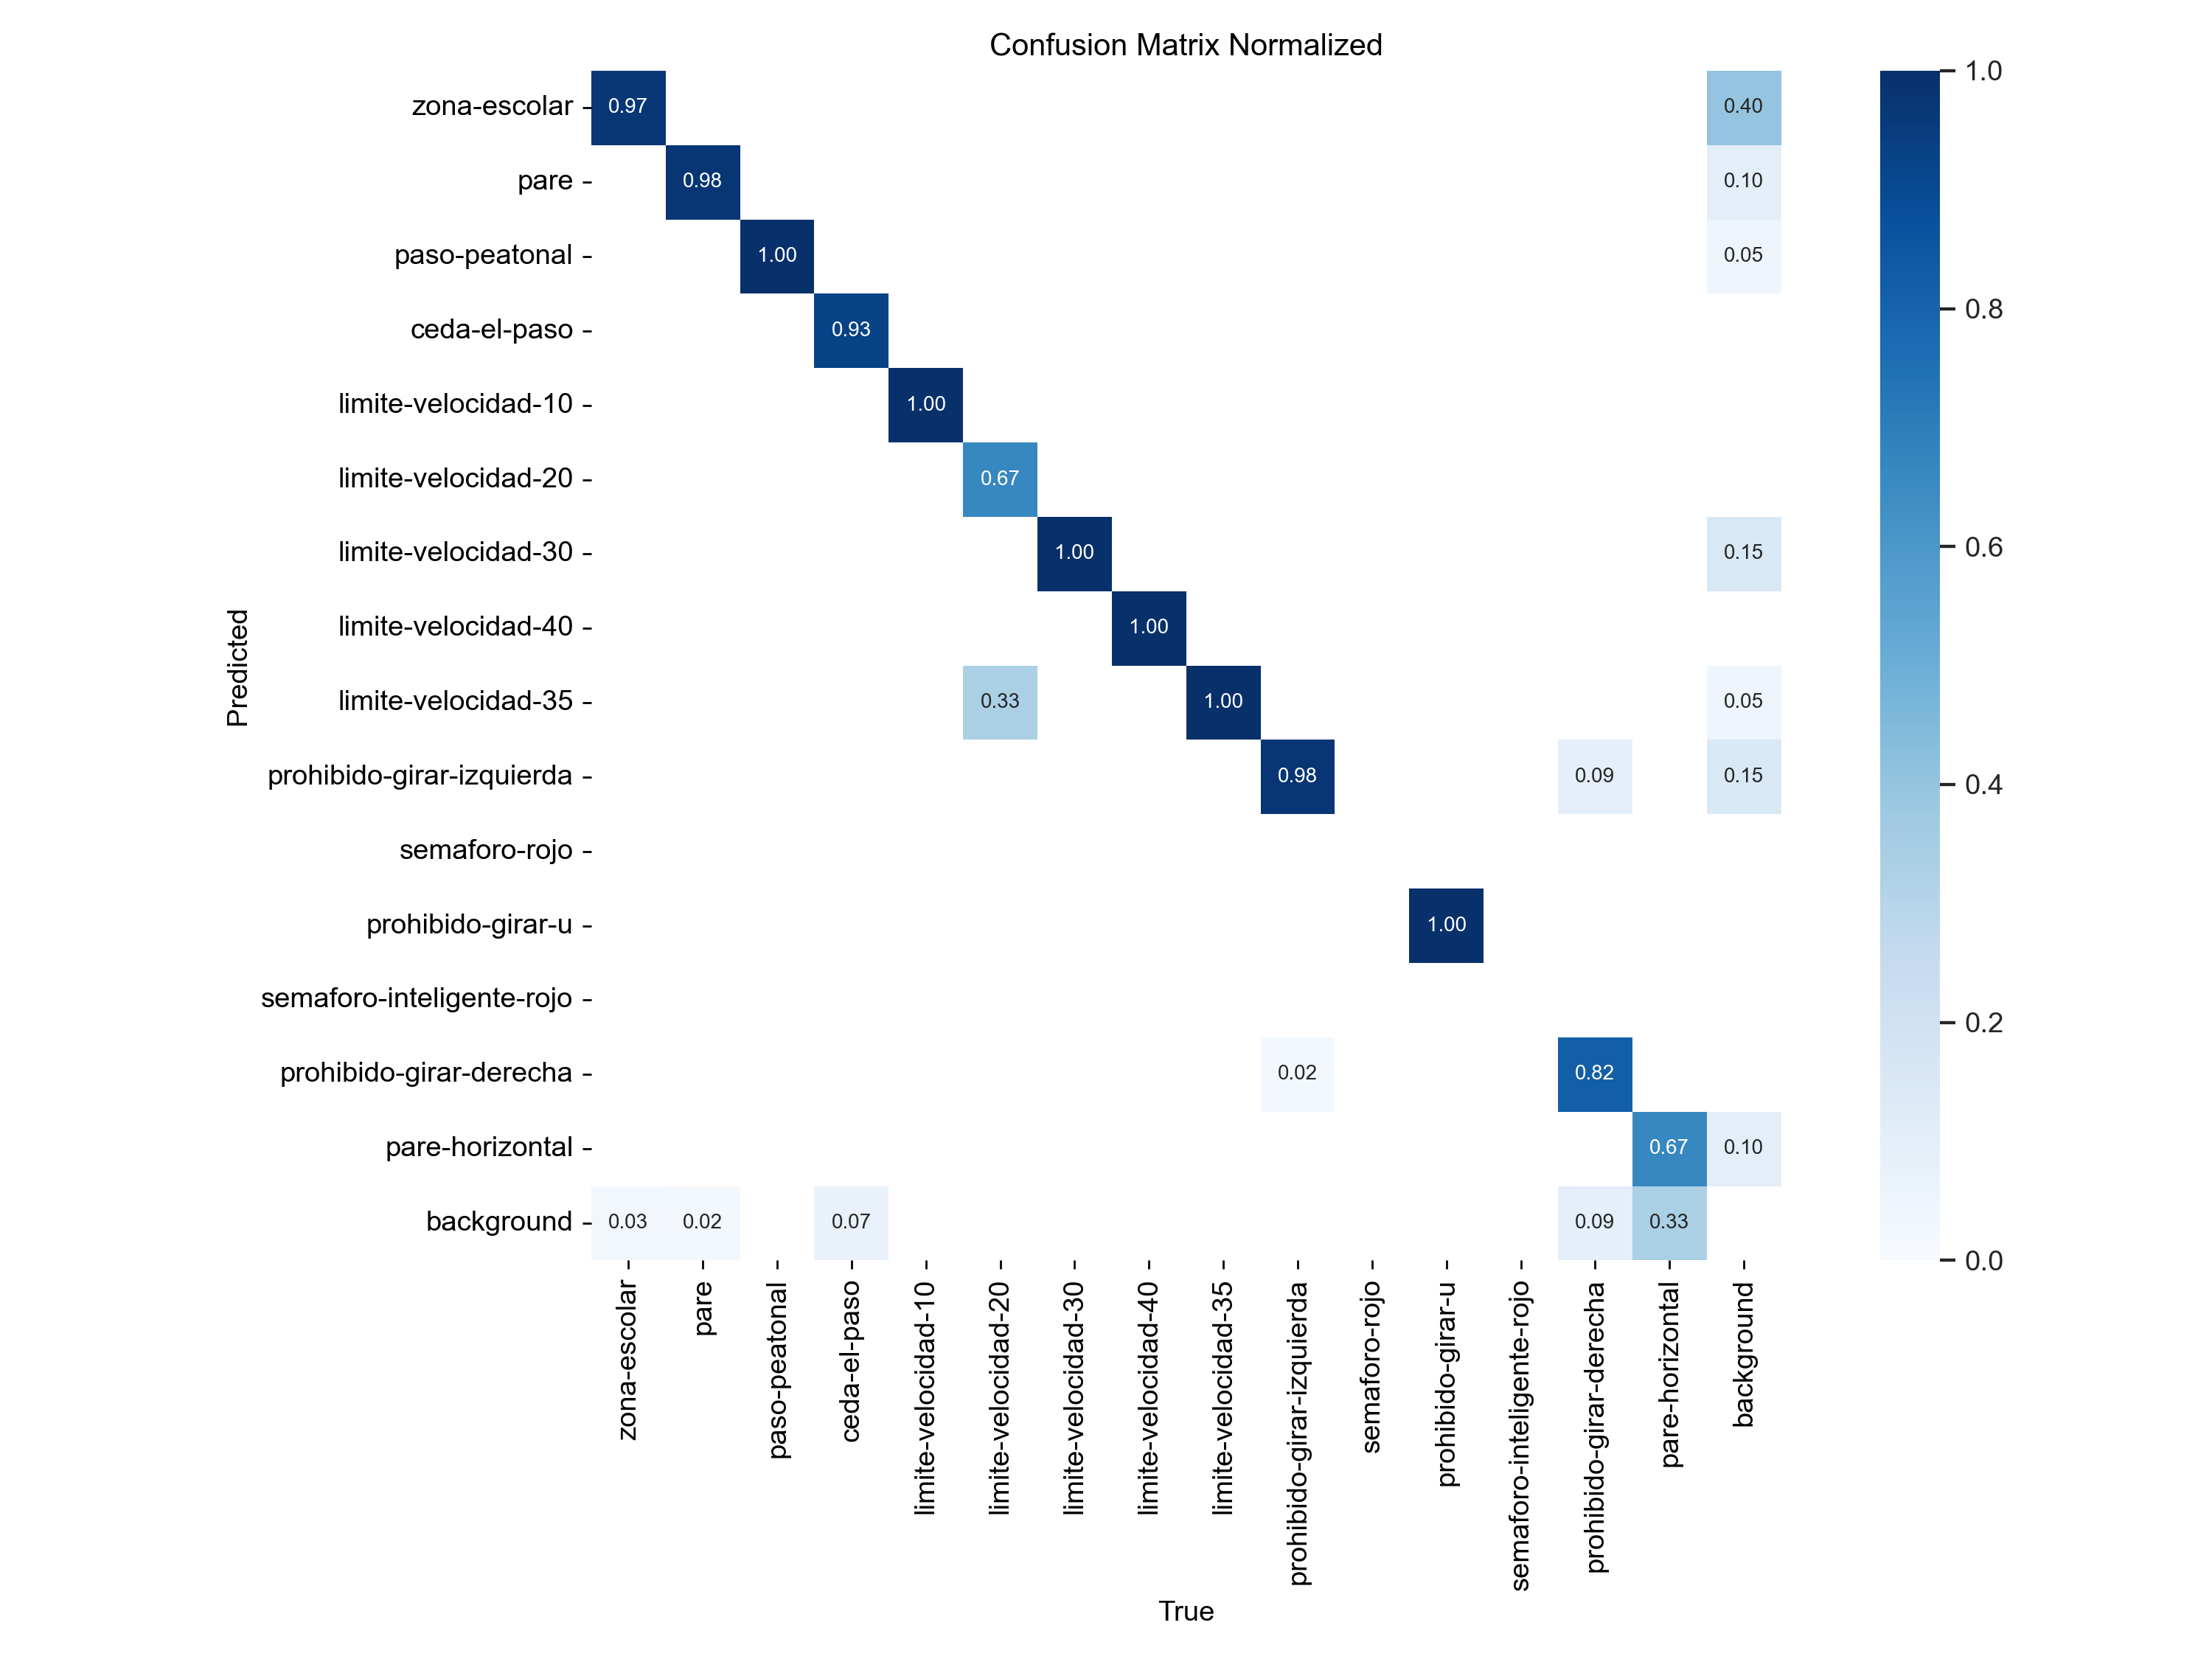

In [21]:
Image(filename=f'{HOME}/runs/detect/train25/confusion_matrix_normalized.png', width=600)


## Exportar modelo

In [24]:
!yolo export model={HOME}/runs/detect/train25/weights/best.pt format=tflite imgsz=640

Ultralytics YOLOv8.1.34 ðŸš€ Python-3.10.15 torch-2.5.1+cu124 CPU (Intel Core(TM) i7-8700 3.20GHz)
YOLOv10n summary (fused): 285 layers, 2700266 parameters, 0 gradients, 8.3 GFLOPs

PyTorch: starting from 'C:\Users\Alvaro\PycharmProjects\copilotoVirtual\runs\detect\train25\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 300, 6) (5.5 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnx2tf>=1.15.4,<=1.17.5', 'sng4onnx>=1.0.1', 'onnxslim==0.1.31', 'onnx_graphsurgeon>=0.3.26', 'tflite_support', 'onnxruntime'] not found, attempting AutoUpdate...


In [8]:
#  Export model to tflite

from ultralytics import YOLO

# Load a model
model = YOLO(f'yolo_cbba.pt')  # load a custom trained model
# model.save('yolo_cbba.pt')

# model.export(format="onnx")
# Export the model

# model.save_pretrained(f'{HOME}/runs/detect/train20/weights/best')

model.export(format='tflite')

c:\apps\anaconda3\envs\copiloto-virtual\lib\site-packages\ultralytics\nn\tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cp

FileNotFoundError: [Errno 2] No such file or directory: 'yolo_cbba.pt'